https://developer.twitter.com/en/docs/twitter-api/tweets/lookup/introduction

https://docs.tweepy.org/en/latest/

https://docs.tweepy.org/en/v3.10.0/cursor_tutorial.html

In [108]:
import pandas as pd
import numpy as np
import json
import os
import io
from io import BytesIO

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import tweepy
from tweepy import Cursor

import requests
from PIL import Image
from matplotlib.pyplot import imshow

# import urllib.request


In [4]:
consumer_key = 'consumer_key'
consumer_secret = 'consumer_secret'
access_token = 'access_token'
access_secret = 'access_secret'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [129]:
# Collect and store tweets
tweet_count = 0
max_tweets = 2000
errors = 0
max_seq_errors = 2000

tweets = []

for status in Cursor(api.user_timeline, 
                     id='ratemyskyperoom', 
                     screen_name='Room Rater',
                     exclude_replies=True).items():

    if tweet_count == max_tweets:
        break
    
    if errors == max_seq_errors:
        break
        
    try: 
        tweet_id = status.id
        tweet_text = status.text
        image_url = status.entities.get('media')[0]['media_url']
        favorites = status.favorite_count

        tweet = {'tweet_id':tweet_id,
                 'tweet_text':tweet_text,
                 'image_url':image_url,
                'favorites':favorites}

        tweets.append(tweet)
        
        
    except:
        errors += 1
        continue
    
    tweet_count += 1
    errors = 0
    
# Store as dataframe
tweet_df = pd.DataFrame(tweets,
                       columns = ['tweet_id',
                                  'tweet_text',
                                  'image_url',
                                  'favorites'])

tweet_df.to_csv('roomratertweets.csv', index=False)

#Resource for reading media_url:
#https://miguelmalvarez.com/2015/03/03/download-the-pictures-from-a-twitter-feed-using-python/

In [133]:
df = pd.read_csv('roomratertweets.csv')
df.tail()

,tweet_id,tweet_text,image_url,favorites
1053,1347525276654317569,So very much white. Use bright pillows. Add co...,http://pbs.twimg.com/media/ErNfGLDXEAEFQSg.jpg,1712
1054,1347518461879193600,Maps are art. Turn lamp on. Add more. 6/10 @Re...,http://pbs.twimg.com/media/ErNY5hNWMAEDiUl.jpg,418
1055,1347517709005819904,Love the art. Colors. Shapes. Pull back a tad...,http://pbs.twimg.com/media/ErNYNqpXYAMOeJh.jpg,343
1056,1347387661972107264,Classic Hostage video as only @nytmike can del...,http://pbs.twimg.com/media/ErLh7_ZXMAIVFco.jpg,1322
1057,1347386250056097793,"There’s a nice bowl. Swing and miss. Sorry, @S...",http://pbs.twimg.com/media/ErLgpy7WMAARU8a.jpg,611


In [168]:
# Display image
def display_image(df, record):
    image_url = tweet_df.image_url.iloc[record]
    text = tweet_df.tweet_text.iloc[record]
    view_img = Image.open(requests.get(image_url, stream=True).raw)

    fig, ax = plt.subplots()
    plt.title('Room Rater Review')
    fig.text(.5,.07, text, ha='center', fontsize=9)
    plt.imshow(view_img)
    ax.set_axis_off()
    plt.axis('off')
    
    return plt.show()
    
# https://stackoverflow.com/questions/7391945/how-do-i-read-image-data-from-a-url-in-python

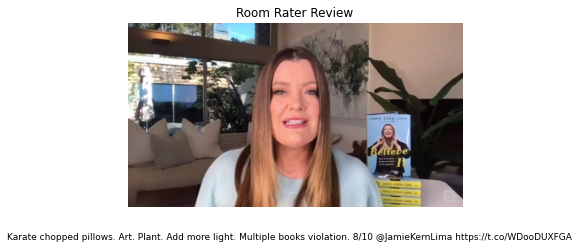

In [169]:
display_image(df, 1)